1. Packages

In [41]:
from google.colab import files

uploaded = files.upload()


Saving Project2.xlsx to Project2 (1).xlsx


In [ ]:
import pandas as pd

data = pd.read_excel('DataSet.xlsx')

data.columns = ['Year', 'Gold Price']

data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data = data.dropna()

data.tail()


,Year,Gold Price
55,2021,55720.0
56,2022,65000.0
57,2023,69330.0
58,2024,78510.0
59,2025,90000.0


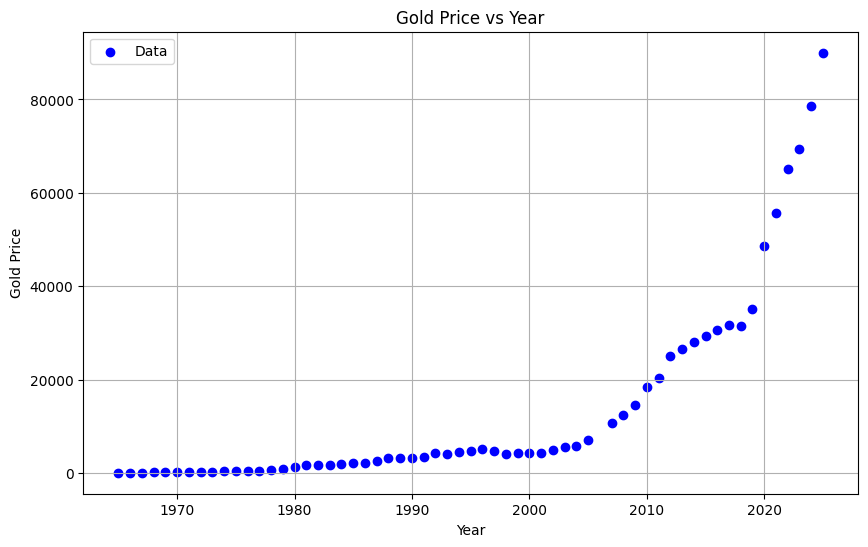

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['Year'], data['Gold Price'], color='blue', label='Data')
plt.title('Gold Price vs Year')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.grid(True)
plt.legend()
plt.show()


In [44]:
from sklearn.model_selection import train_test_split

X = data[['Year']]
y = data['Gold Price']

# training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 48
Testing set size: 12


In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

degree = 5
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

poly_model.fit(X_train, y_train)

y_pred = poly_model.predict(X_test)

print("Model Coefficients:", poly_model.named_steps['linearregression'].coef_)
print("Model Intercept:", poly_model.named_steps['linearregression'].intercept_)


Model Coefficients: [ 0.00000000e+00  7.15015291e-07  1.46911636e-03  1.46562826e+00
 -1.10677954e-03  2.22874770e-07]
Model Intercept: -1148548864.9294918


In [46]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 8708572.219427006
R² Score: 0.9809860714893687


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


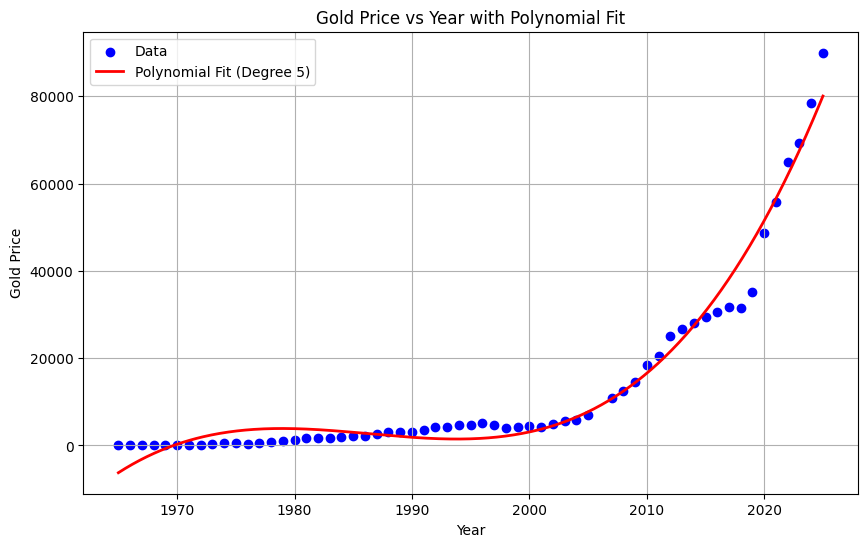

In [47]:
import numpy as np

years = np.linspace(data['Year'].min(), data['Year'].max(), 500).reshape(-1, 1)
gold_price_pred = poly_model.predict(years)


plt.figure(figsize=(10, 6))
plt.scatter(data['Year'], data['Gold Price'], color='blue', label='Data')
plt.plot(years, gold_price_pred, color='red', linewidth=2, label=f'Polynomial Fit (Degree {degree})')
plt.title('Gold Price vs Year with Polynomial Fit')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.grid(True)
plt.legend()
plt.show()


In [49]:
year = 2025
new_year = pd.DataFrame({'Year': [year+1]})
predicted_price = poly_model.predict(new_year)
print(f"Predicted Gold Price for {year}: {predicted_price[0]}")


Predicted Gold Price for 2025: 86819.66645741463


In [50]:
import joblib

joblib.dump(poly_model, 'polynomial_regression_model.pkl')
print("Model saved as polynomial_regression_model.pkl")


Model saved as polynomial_regression_model.pkl


In [51]:
from google.colab import files

files.download('polynomial_regression_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>